In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS= 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AgriculturalPest",
    shuffle=True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
)

Found 5494 files belonging to 12 classes.


In [4]:
class_names = dataset.class_names
class_names

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

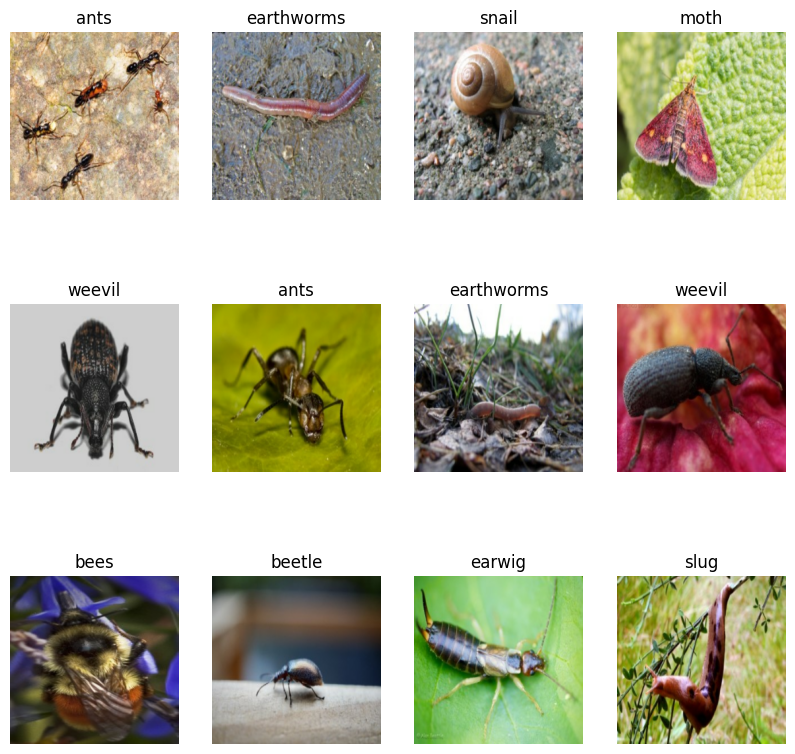

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
print(len(train_ds), len(val_ds), len(test_ds))

137 17 18


In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
137/137 [==============================] - 107s 651ms/step - loss: 2.4592 - accuracy: 0.1065 - val_loss: 2.4673 - val_accuracy: 0.1158
Epoch 2/50
137/137 [==============================] - 45s 327ms/step - loss: 2.3543 - accuracy: 0.1683 - val_loss: 2.3014 - val_accuracy: 0.2059
Epoch 3/50
137/137 [==============================] - 35s 255ms/step - loss: 2.2224 - accuracy: 0.2151 - val_loss: 2.2741 - val_accuracy: 0.1893
Epoch 4/50
137/137 [==============================] - 35s 256ms/step - loss: 2.1037 - accuracy: 0.2709 - val_loss: 2.2594 - val_accuracy: 0.2188
Epoch 5/50
137/137 [==============================] - 36s 262ms/step - loss: 2.0086 - accuracy: 0.3173 - val_loss: 2.0764 - val_accuracy: 0.2610
Epoch 6/50
137/137 [==============================] - 35s 258ms/step - loss: 1.8969 - accuracy: 0.3594 - val_loss: 1.9871 - val_accuracy: 0.3309
Epoch 7/50
137/137 [==============================] - 35s 258ms/step - loss: 1.8408 - accuracy: 0.3784 - val_loss: 2.0704 - val_a

137/137 [==============================] - 35s 259ms/step - loss: 0.7998 - accuracy: 0.7277 - val_loss: 1.7629 - val_accuracy: 0.4982
Epoch 41/50
137/137 [==============================] - 35s 259ms/step - loss: 0.8042 - accuracy: 0.7279 - val_loss: 1.7202 - val_accuracy: 0.5129
Epoch 42/50
137/137 [==============================] - 36s 260ms/step - loss: 0.7590 - accuracy: 0.7410 - val_loss: 1.6560 - val_accuracy: 0.5092
Epoch 43/50
137/137 [==============================] - 36s 262ms/step - loss: 0.7585 - accuracy: 0.7435 - val_loss: 1.7524 - val_accuracy: 0.4926
Epoch 44/50
137/137 [==============================] - 36s 262ms/step - loss: 0.7541 - accuracy: 0.7412 - val_loss: 1.7006 - val_accuracy: 0.5018
Epoch 45/50
137/137 [==============================] - 36s 261ms/step - loss: 0.7456 - accuracy: 0.7478 - val_loss: 1.8193 - val_accuracy: 0.4761
Epoch 46/50
137/137 [==============================] - 36s 261ms/step - loss: 0.7256 - accuracy: 0.7563 - val_loss: 1.8975 - val_accurac

In [16]:
scores = model.evaluate(test_ds)

18/18 [==============================] - 44s 88ms/step - loss: 1.6746 - accuracy: 0.5417


In [17]:
scores

[1.6745684146881104, 0.5416666865348816]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

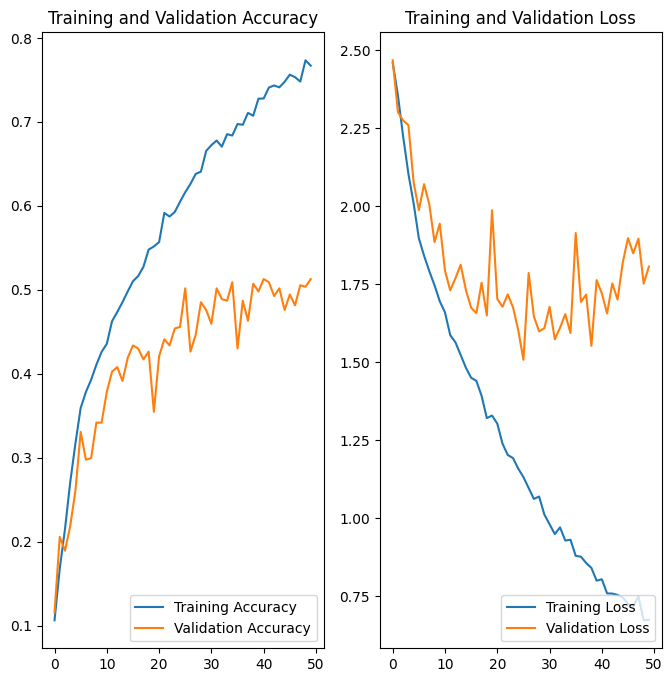

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: moth
1/1 [==============================] - 1s 830ms/step
predicted label: ants


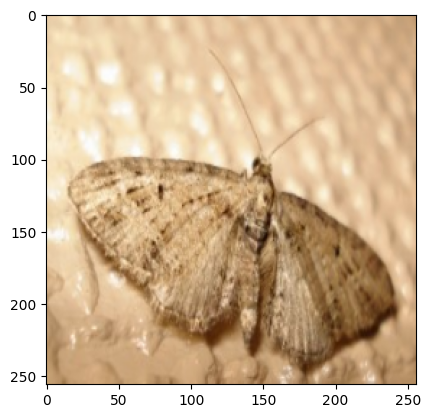

In [20]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [21]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


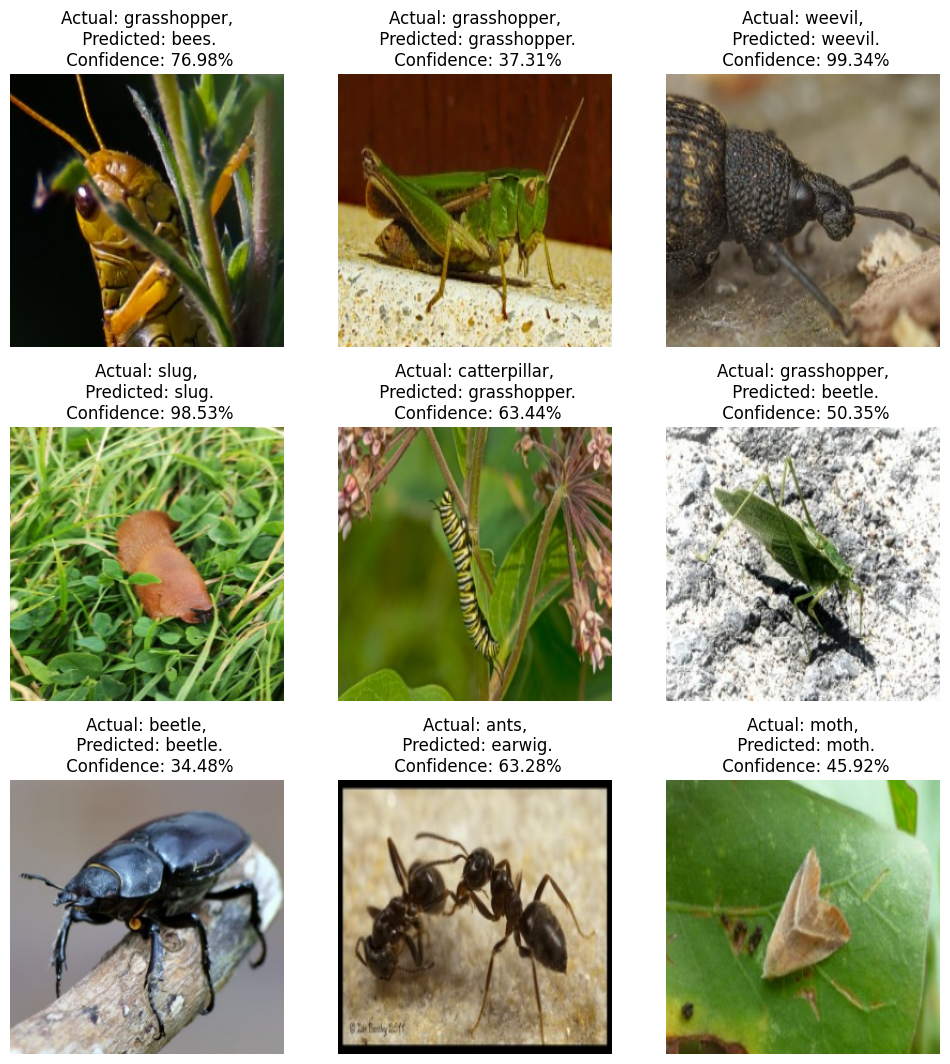

In [29]:
plt.figure(figsize=(12,13))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')